# Student Marks Prediction using supervised ML


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("student_info.csv")
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [3]:
#showing first five rows
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
#Showing Last five rows
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:

df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


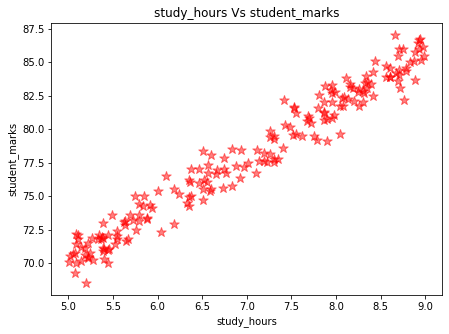

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(x=df.study_hours,y=df.student_marks,color="red",marker="*",s=100,alpha=0.5)
plt.xlabel("study_hours")
plt.ylabel("student_marks")
plt.title("study_hours Vs student_marks")
plt.show()

In [9]:
#Data Cleaning
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [14]:
df.isnull().sum()
     

study_hours      5
student_marks    0
dtype: int64

In [20]:

df2=df.fillna(df.mean())

In [15]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

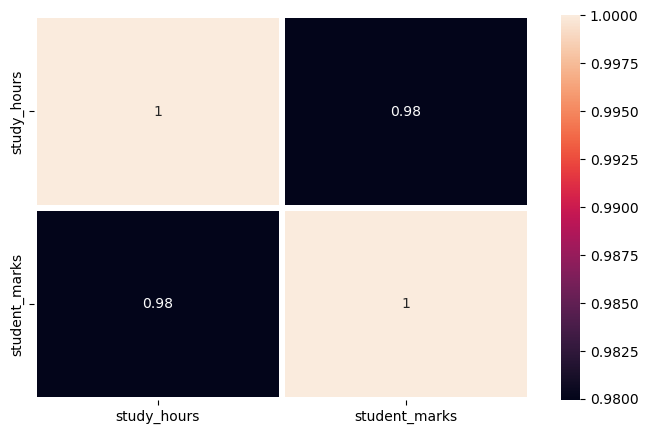

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,linewidths=3)
plt.show()

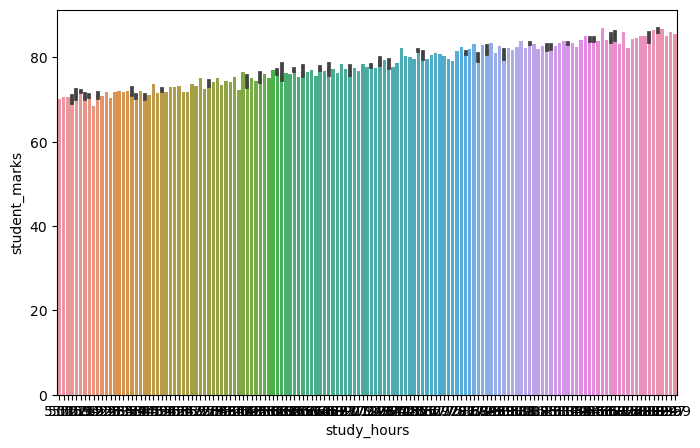

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x="study_hours",y="student_marks",data=df2)
plt.show()
     

In [25]:
#split dataset
#matrix = X = Independent Variable = student_hours
#vector = y = Dependent Variable = student_marks

X=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")
print("shape of X =",X.shape)
print("shape of y =",y.shape)

shape of X = (200, 1)
shape of y = (200, 1)


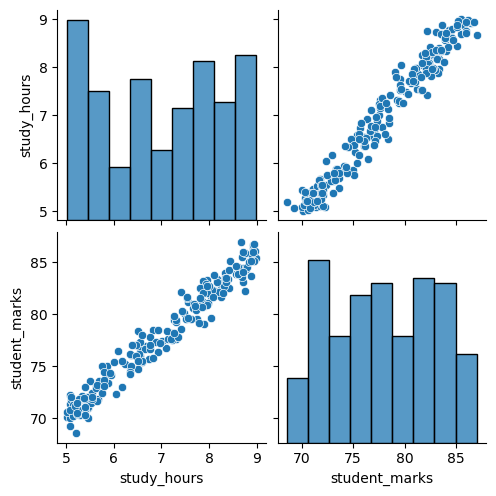

In [26]:
sns.pairplot(df)
     

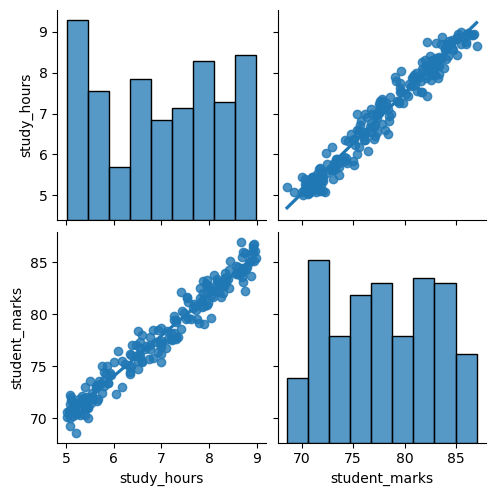

In [27]:
sns.pairplot(df2,kind="reg")

In [28]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=51) # taking 20% data for test. 20% is randomly
print("shape of X_train =",X_train.shape)
print("shape of y_train =",y_train.shape)
print("shape of X_test =",X_test.shape)
print("shape of y_test =",y_test.shape)


shape of X_train = (160, 1)
shape of y_train = (160, 1)
shape of X_test = (40, 1)
shape of y_test = (40, 1)


In [29]:
#Selecting a model and train it
#Linear Regression
# y=m*x+c   
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
     

In [30]:

lr.fit(X_train,y_train)

LinearRegression()

In [31]:
#value of m
lr.coef_

array([[3.93571802]])

In [32]:
#subsyituting the value of m and c in the formula 
# y = m * x + c

m= 3.93571802
c= 50.44735504

y= m * 5 + c
y

70.12594514

In [33]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [34]:
#Creating a DataFrame for easy analysis
#concatenating the test and pred value.
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study_hours","student_marks_original Percentage","student_marks_predicted Percentage"])

,study_hours,student_marks_original Percentage,student_marks_predicted Percentage
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [35]:

lr.score(X_test,y_test)                  #Getting 95% Accuracy

0.9514124242154464

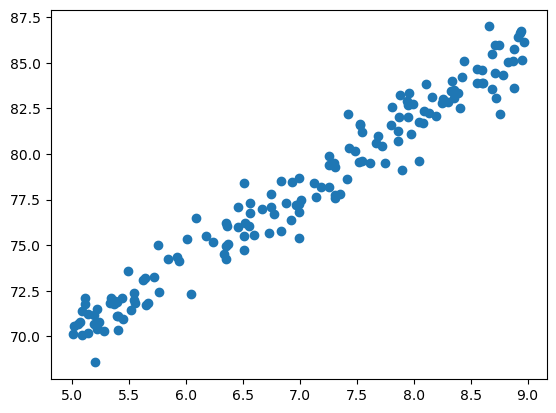

In [36]:
plt.scatter(X_train,y_train)

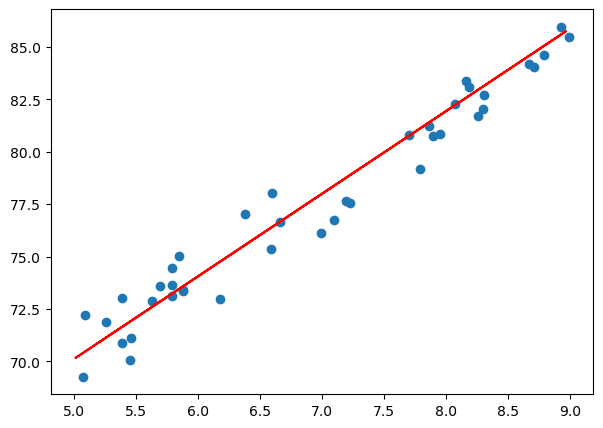

In [37]:

plt.figure(figsize=(7,5))
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

# Save Our Macine Learning Model


In [38]:

import joblib
joblib.dump(lr, "Student_mark_prediction_model.pkl")

['Student_mark_prediction_model.pkl']

In [39]:

model = joblib.load("Student_mark_prediction_model.pkl")

In [40]:

model.predict([[4]])[0][0]

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19022710353573